In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import layers, models, datasets

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from tensorflow.keras.layers import Convolution2D, MaxPool2D
from tensorflow.keras.models import Sequential

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [6]:
# dir(datasets.cifar10.load_data())

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

In [124]:
# help(datasets.cifar10.load_data())

In [7]:
(xtr, ytr), (xte, yte) = datasets.cifar10.load_data()

In [8]:
xtr

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [9]:
ytr

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
xtr.shape

(50000, 32, 32, 3)

In [11]:
ytr.shape

(50000, 1)

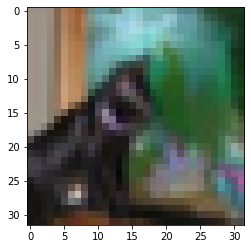

In [12]:
img1 = plt.imshow(xtr[159])

In [13]:
ytr = ytr.reshape(-1,)

In [14]:
ytr

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

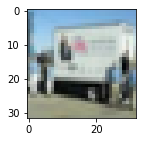

In [15]:
plt.figure(figsize=(15, 2))
plt.imshow(xtr[76])

In [16]:
ytr.shape

(50000,)

In [135]:
type(ytr)

numpy.ndarray

In [17]:
xtr

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [18]:
imgclass = ['aeroplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [19]:
def plot_img(x, y, indx):
    plt.figure(figsize=(15, 2))
    plt.imshow(xtr[indx])
    plt.xlabel(imgclass[ytr[indx]])

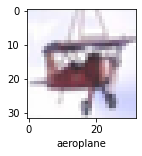

In [20]:
plot_img(xtr, ytr, 4563)

In [140]:
xtr

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [21]:
xtr = xtr/255

In [22]:
xtr

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [23]:
xte

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [82]:
xte.shape

(10000, 32, 32, 3)

In [24]:
xte = xte/255

In [25]:
xte

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [26]:
mdcnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPool2D((2,2)),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    
    tf.keras.layers.Dense(10, activation='softmax')    
    
]
)

In [27]:
mdcnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
mdcnn.fit(xtr, ytr, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 36s 18ms/step - loss: 1.5034 - accuracy: 0.4597
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1692 - accuracy: 0.5882
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0631 - accuracy: 0.6293
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9830 - accuracy: 0.6585
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9244 - accuracy: 0.6773
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8757 - accuracy: 0.6955
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8442 - accuracy: 0.7063
Epoch 8/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8005 - accuracy: 0.7224
Epoch 9/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.7732 - accuracy: 0.7313
Epoch 10/10
1563/1563 [==============================] - 29s 18m

In [29]:
mdcnn.evaluate(xte, yte)

313/313 [==============================] - 2s 5ms/step - loss: 0.9322 - accuracy: 0.6849


[0.9322251081466675, 0.6848999857902527]

In [30]:
yte

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [31]:
yte.shape

(10000, 1)

In [32]:
yte = yte.reshape(-1,)

In [33]:
yte

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [34]:
ypreds = mdcnn.predict(xte)

In [35]:
ypreds

array([[1.41682068e-03, 4.46982485e-05, 2.25145333e-02, ...,
        2.64815730e-03, 1.08892110e-03, 6.61973390e-05],
       [6.35866192e-04, 9.52448137e-03, 1.86184920e-07, ...,
        6.29580346e-11, 9.89826202e-01, 1.17668524e-05],
       [1.64373130e-01, 1.44118667e-01, 2.03028484e-03, ...,
        1.13819224e-04, 6.60217583e-01, 2.10190308e-03],
       ...,
       [8.66747723e-05, 8.98005339e-07, 1.75817907e-01, ...,
        5.38081415e-02, 1.35876588e-04, 6.41571432e-06],
       [1.50053594e-02, 1.43854618e-01, 4.61039916e-02, ...,
        5.12532890e-03, 1.34021786e-04, 2.37365579e-03],
       [2.07635503e-06, 7.16338718e-06, 2.41650687e-05, ...,
        9.89275157e-01, 6.61422277e-08, 9.45043780e-07]], dtype=float32)

In [36]:
ypreds.shape

(10000, 10)

In [39]:
ypreds

array([[1.41682068e-03, 4.46982485e-05, 2.25145333e-02, ...,
        2.64815730e-03, 1.08892110e-03, 6.61973390e-05],
       [6.35866192e-04, 9.52448137e-03, 1.86184920e-07, ...,
        6.29580346e-11, 9.89826202e-01, 1.17668524e-05],
       [1.64373130e-01, 1.44118667e-01, 2.03028484e-03, ...,
        1.13819224e-04, 6.60217583e-01, 2.10190308e-03],
       ...,
       [8.66747723e-05, 8.98005339e-07, 1.75817907e-01, ...,
        5.38081415e-02, 1.35876588e-04, 6.41571432e-06],
       [1.50053594e-02, 1.43854618e-01, 4.61039916e-02, ...,
        5.12532890e-03, 1.34021786e-04, 2.37365579e-03],
       [2.07635503e-06, 7.16338718e-06, 2.41650687e-05, ...,
        9.89275157e-01, 6.61422277e-08, 9.45043780e-07]], dtype=float32)

In [40]:
ypreds[0]

array([1.4168207e-03, 4.4698249e-05, 2.2514533e-02, 6.1387813e-01,
       6.8126698e-03, 3.4975502e-01, 1.7747345e-03, 2.6481573e-03,
       1.0889211e-03, 6.6197339e-05], dtype=float32)

In [38]:
np.argmax(ypreds[0])

3

In [41]:
yclasses = [np.argmax(ele) for ele in ypreds]

In [42]:
yclasses

[3,
 8,
 8,
 0,
 4,
 6,
 5,
 6,
 3,
 1,
 4,
 9,
 2,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 0,
 4,
 9,
 4,
 4,
 2,
 2,
 9,
 6,
 6,
 5,
 4,
 3,
 9,
 3,
 7,
 1,
 9,
 5,
 4,
 6,
 5,
 6,
 0,
 9,
 3,
 9,
 7,
 2,
 9,
 8,
 2,
 3,
 8,
 8,
 7,
 5,
 2,
 3,
 7,
 5,
 6,
 3,
 6,
 2,
 1,
 2,
 5,
 7,
 0,
 3,
 8,
 8,
 9,
 2,
 0,
 5,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 4,
 8,
 9,
 9,
 0,
 3,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 3,
 4,
 5,
 6,
 3,
 1,
 1,
 2,
 6,
 8,
 7,
 4,
 0,
 2,
 2,
 1,
 3,
 0,
 4,
 6,
 5,
 8,
 3,
 1,
 2,
 8,
 2,
 8,
 3,
 3,
 8,
 4,
 1,
 8,
 9,
 1,
 3,
 7,
 7,
 2,
 8,
 2,
 5,
 6,
 5,
 8,
 7,
 6,
 5,
 5,
 3,
 8,
 1,
 6,
 0,
 6,
 5,
 2,
 9,
 3,
 4,
 2,
 1,
 6,
 6,
 8,
 7,
 8,
 4,
 5,
 0,
 9,
 6,
 8,
 8,
 9,
 9,
 6,
 7,
 5,
 9,
 0,
 5,
 2,
 2,
 7,
 8,
 6,
 3,
 3,
 8,
 5,
 8,
 0,
 1,
 7,
 6,
 8,
 8,
 5,
 8,
 5,
 8,
 8,
 7,
 1,
 3,
 8,
 5,
 7,
 9,
 5,
 0,
 5,
 7,
 8,
 0,
 7,
 9,
 0,
 4,
 7,
 3,
 9,
 5,
 3,
 9,
 2,
 2,
 3,
 6,
 5,
 1,
 5,
 8,
 8,
 0,
 4,
 9,
 3,
 5,
 1,
 1,
 1,
 9,
 0,
 8,
 1,
 8,
 2,
 0,


In [43]:
yte

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [44]:
# ypredslst = []
# for i in range(ypreds.shape[0]):
#     ypredslst.append(np.argmax(ypreds[i]))

In [44]:
mdcnn.evaluate(xte, yte)

313/313 [==============================] - 2s 6ms/step - loss: 0.9322 - accuracy: 0.6849


[0.9322251081466675, 0.6848999857902527]

In [91]:
yte

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [46]:
yte

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [48]:
yclasses

[3,
 8,
 8,
 0,
 4,
 6,
 5,
 6,
 3,
 1,
 4,
 9,
 2,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 0,
 4,
 9,
 4,
 4,
 2,
 2,
 9,
 6,
 6,
 5,
 4,
 3,
 9,
 3,
 7,
 1,
 9,
 5,
 4,
 6,
 5,
 6,
 0,
 9,
 3,
 9,
 7,
 2,
 9,
 8,
 2,
 3,
 8,
 8,
 7,
 5,
 2,
 3,
 7,
 5,
 6,
 3,
 6,
 2,
 1,
 2,
 5,
 7,
 0,
 3,
 8,
 8,
 9,
 2,
 0,
 5,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 4,
 8,
 9,
 9,
 0,
 3,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 3,
 4,
 5,
 6,
 3,
 1,
 1,
 2,
 6,
 8,
 7,
 4,
 0,
 2,
 2,
 1,
 3,
 0,
 4,
 6,
 5,
 8,
 3,
 1,
 2,
 8,
 2,
 8,
 3,
 3,
 8,
 4,
 1,
 8,
 9,
 1,
 3,
 7,
 7,
 2,
 8,
 2,
 5,
 6,
 5,
 8,
 7,
 6,
 5,
 5,
 3,
 8,
 1,
 6,
 0,
 6,
 5,
 2,
 9,
 3,
 4,
 2,
 1,
 6,
 6,
 8,
 7,
 8,
 4,
 5,
 0,
 9,
 6,
 8,
 8,
 9,
 9,
 6,
 7,
 5,
 9,
 0,
 5,
 2,
 2,
 7,
 8,
 6,
 3,
 3,
 8,
 5,
 8,
 0,
 1,
 7,
 6,
 8,
 8,
 5,
 8,
 5,
 8,
 8,
 7,
 1,
 3,
 8,
 5,
 7,
 9,
 5,
 0,
 5,
 7,
 8,
 0,
 7,
 9,
 0,
 4,
 7,
 3,
 9,
 5,
 3,
 9,
 2,
 2,
 3,
 6,
 5,
 1,
 5,
 8,
 8,
 0,
 4,
 9,
 3,
 5,
 1,
 1,
 1,
 9,
 0,
 8,
 1,
 8,
 2,
 0,


In [51]:
print('Classification Report : ', classification_report(yte, yclasses))

Classification Report :                precision    recall  f1-score   support

           0       0.74      0.73      0.73      1000
           1       0.78      0.82      0.80      1000
           2       0.58      0.58      0.58      1000
           3       0.47      0.51      0.49      1000
           4       0.69      0.61      0.64      1000
           5       0.56      0.61      0.59      1000
           6       0.79      0.72      0.75      1000
           7       0.73      0.75      0.74      1000
           8       0.73      0.81      0.77      1000
           9       0.82      0.70      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.69     10000
weighted avg       0.69      0.68      0.69     10000

